In [2]:
import numpy as np

import cv2

import matplotlib.pyplot as plt

import random

In [3]:
k = np.array([[-1, -2, -1], [0, 0, 0], [1 ,2, 1]])

k

array([[-1, -2, -1],
       [ 0,  0,  0],
       [ 1,  2,  1]])

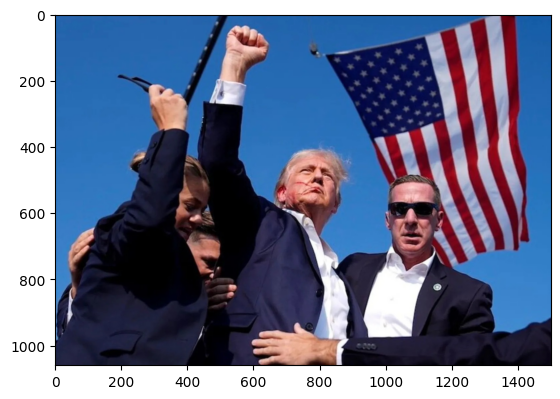

In [4]:
img = cv2.imread("media/Trump.jpeg")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

In [5]:
img.shape

(1060, 1500, 3)

In [6]:
m = img.shape[0]

n = img.shape[1]

patch = np.zeros((m,n,3))

for i in range(1, m-2):
    for j in range(1, n-2):
        subpatch = img[i-1:i+2, j-1:j+2]
        res = subpatch*k
        summation = np.sum(res)
        patch[i,j] = summation      

In [7]:
img[1:4, 1:4]

array([[[ 40, 100, 172],
        [ 40, 100, 170],
        [ 40, 100, 170]],

       [[ 40, 100, 170],
        [ 40, 100, 170],
        [ 40, 100, 170]],

       [[ 40, 100, 170],
        [ 40, 100, 170],
        [ 40, 100, 170]]], dtype=uint8)

In [8]:
img[1:4, 1:4]*k

array([[[ -40, -200, -172],
        [   0,    0,    0],
        [  40,  200,  170]],

       [[ -40, -200, -170],
        [   0,    0,    0],
        [  40,  200,  170]],

       [[ -40, -200, -170],
        [   0,    0,    0],
        [  40,  200,  170]]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1987.0..1991.0].


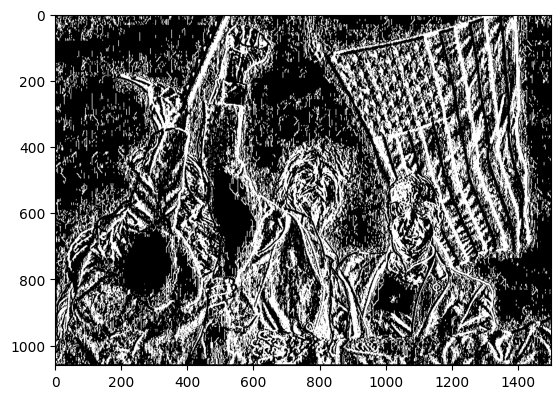

In [9]:
plt.imshow(patch)

In [21]:
pad = np.zeros((m+2, n+2, 3), dtype ="int32")

for i in range(1, m+1):
    for j in range(1,n+1):
        pad[i, j] = img[i-1,j-1]


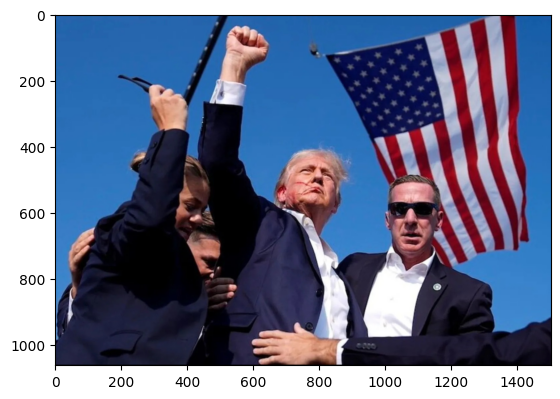

In [22]:
plt.imshow(pad)

In [23]:
pad.shape

(1062, 1502, 3)

In [24]:
pad[0, :] = pad[m,:]

pad[m+1,:] = pad[1, :]

pad[:, 0] = pad[:, n]

pad[:, n+1] = pad[:, 1]

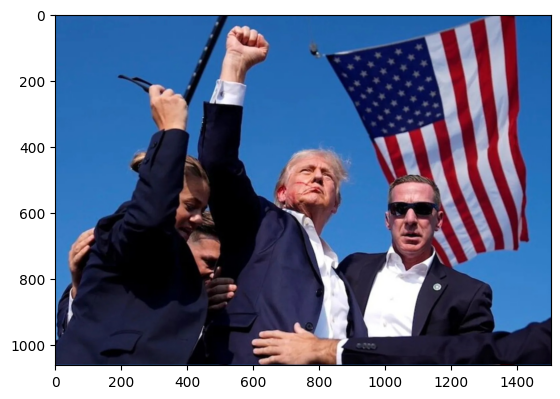

In [25]:
plt.imshow(pad)

In [26]:
x = pad.shape[0]

y = pad.shape[1]

pad_img = np.zeros((m,n,3), dtype="uint8")

for i in range(1, m-2):
    for j in range(1, n-2):
        subpatch = pad[i-1:i+2, j-1:j+2]
        res = subpatch*k
        summation = np.sum(res)
        pad_img[i,j] = summation 

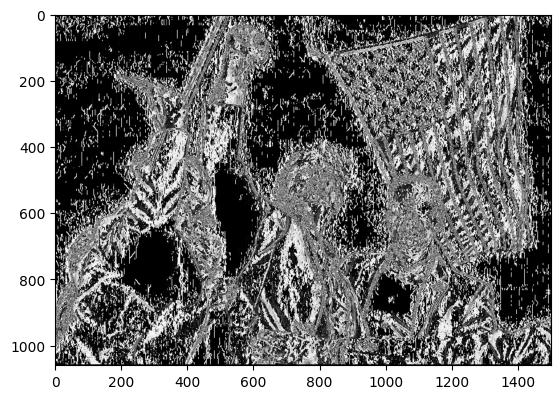

In [27]:
plt.imshow(pad_img)